In [1]:
# Libs 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ler base de dados
base_dados = pd.read_excel('data.xlsx')
# verificando a base de dados
base_dados.head()

,Territorialidades,Produto Interno Bruto per capita 2014,Produto Interno Bruto per capita 2015,Produto Interno Bruto per capita 2016
0,Brasil,22.44,21.17,20.19
1,Ceará,11.22,10.59,10.25
2,Abaiara (CE),4.54,4.20,4.23
3,Acarape (CE),5.56,5.26,5.19
4,Acaraú (CE),6.79,6.50,6.25


In [3]:
# Transformando base dados

# Converter de formato largo (wide) para longo (long)
base_dados2 = pd.melt(
    base_dados,
    id_vars=['Territorialidades'],
    var_name='Ano',
    value_name='PIB per capita'
)

# Limpar o nome das colunas de ano (remover texto e deixar só o ano)
base_dados2['Ano'] = base_dados2['Ano'].str.extract(r'(\d{4})')

# Ordenar (opcional)
base_dados2 = base_dados2.sort_values(['Territorialidades', 'Ano'])

base_dados2.reset_index(drop=True, inplace=True)

base_dados2


,Territorialidades,Ano,PIB per capita
0,,2014,
1,,2015,NaN
2,,2016,NaN
3,Abaiara (CE),2014,4.54
4,Abaiara (CE),2015,4.2
...,...,...,...
562,Viçosa do Ceará (CE),2015,4.06
563,Viçosa do Ceará (CE),2016,4.22
564,Várzea Alegre (CE),2014,5.46
565,Várzea Alegre (CE),2015,5.07


In [10]:
# Remover campos nulos
base_dados2 = base_dados2.dropna()
base_dados2

,Territorialidades,Ano,PIB per capita
0,,2014,
3,Abaiara (CE),2014,4.54
4,Abaiara (CE),2015,4.2
5,Abaiara (CE),2016,4.23
6,Acarape (CE),2014,5.56
...,...,...,...
562,Viçosa do Ceará (CE),2015,4.06
563,Viçosa do Ceará (CE),2016,4.22
564,Várzea Alegre (CE),2014,5.46
565,Várzea Alegre (CE),2015,5.07


In [14]:
base_dados2.columns

Index(['Territorialidades', 'Ano', 'PIB per capita'], dtype='object')

In [18]:
# limpando colunas
# Remover espaços
base_dados2['PIB per capita'] = base_dados2['PIB per capita'].astype(str).str.strip()

# Substituir vírgula por ponto
base_dados2['PIB per capita'] = base_dados2['PIB per capita'].str.replace(',', '.', regex=False)

# Remover strings vazias virando NaN
base_dados2['PIB per capita'] = base_dados2['PIB per capita'].replace('', None)

# Converter para float
base_dados2['PIB per capita'] = base_dados2['PIB per capita'].astype(float)


In [21]:
# Remover linhas d[com dads=os nulos/brancos
base_dados2 = base_dados2.dropna()


In [22]:
# agrupar dados
base_dados2.groupby(['Territorialidades', 'Ano']).mean()

PIB per capita
Territorialidades    Ano                 
Abaiara (CE)         2014            4.54
                     2015            4.20
                     2016            4.23
Acarape (CE)         2014            5.56
                     2015            5.26
...                                   ...
Viçosa do Ceará (CE) 2015            4.06
                     2016            4.22
Várzea Alegre (CE)   2014            5.46
                     2015            5.07
                     2016            5.27

[558 rows x 1 columns]

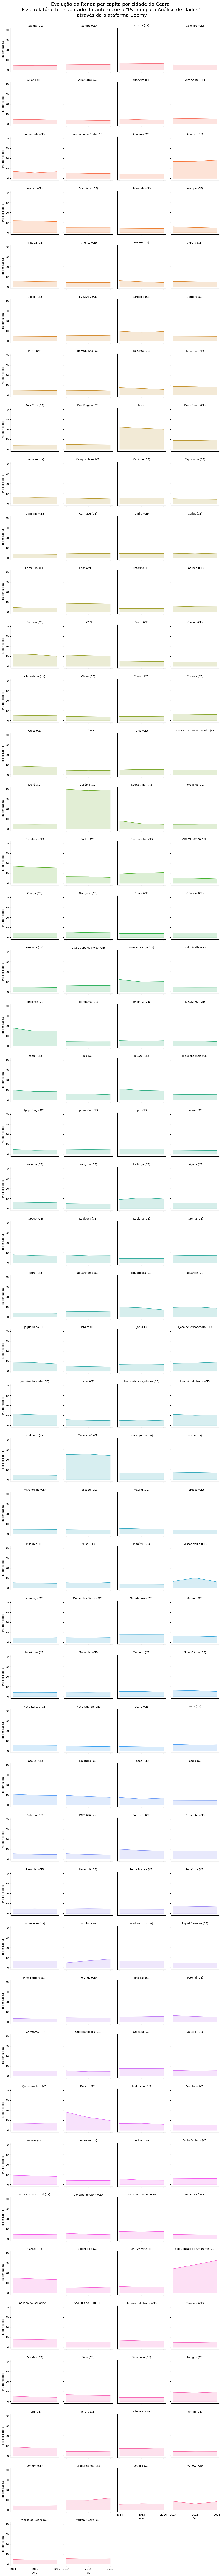

In [32]:
#Sistema de Grids
# Cor de fundo
cor_fundo= '#f5f5f5'

# Criar o sistema de Grids
grid_graficos = sns.FacetGrid(base_dados2, col='Territorialidades', hue='Territorialidades', col_wrap=4)
# Adicionar grafico linhas em cada grafico
grid_graficos = grid_graficos.map(plt.plot, 'Ano', 'PIB per capita')
# Adicionar uma sombra + Ajuste do título
grid_graficos = grid_graficos.map(plt.fill_between, 'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} Territorialidades')
# Filtrar o título
grid_graficos = grid_graficos.set_titles('{col_name}')
# Adicionar um subtítulo
grid_graficos= grid_graficos.fig.suptitle('Evolução da Renda per capita por cidade do Ceará \n Esse relatório foi elaborado durante o curso "Python para Análise de Dados" \n através da plataforma Udemy', fontsize=18)


# Ajustando o subtítulo
plt.subplots_adjust( top=0.97)
# Salvar arquivo em PDF
plt.savefig("grafico.pdf", bbox_inches="tight")